In [3]:
import yfinance as yf
import bs4 as bs
import requests
import datetime
import pandas as pd


In [22]:
#GET TICKERS
import yfinance as yf
import pandas as pd

# Read and print the stock tickers that make up S&P500
tickers = pd.read_html(
    'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

tickers = list(tickers['Symbol'])

In [24]:
# DOWNLOAD DATA
startDate = datetime.datetime(2000, 1, 1)

#granularity of data:
#       Only less than 60 days): 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h
#       any period = 1d, 5d, 1wk, 1mo, 3mo

df_SP500_2000 = yf.download(tickers, start=startDate, group_by='tickers', interval = '1d') #.Close
#see subheading
df_SP500_2000['A'].columns

[**********************81%%*************         ]  408 of 503 completed

$BF.B: possibly delisted; No price data found  (1d 2000-01-01 00:00:00 -> 2024-06-09)


[*********************100%%**********************]  503 of 503 completed

2 Failed downloads:
['BRK.B']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')
['BF.B']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2000-01-01 00:00:00 -> 2024-06-09)')


In [51]:
df_SP500_2000 = df_SP500_2000.drop(columns = ['BRK.B', 'BF.B'])

/var/folders/bl/sn6qzmq53s7gz65vwpf72tqr0000gn/T/ipykernel_45419/1072360024.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_SP500_2000 = df_SP500_2000.drop(columns = ['BRK.B', 'BF.B'])


In [49]:
key_metrics = [
    'trailingPE',
    'forwardPE',
    'trailingEps',
    'forwardEps',
    'pegRatio',
    'totalRevenue',
    'revenueGrowth',
    'earningsQuarterlyGrowth',
    'profitMargins',
    'grossMargins',
    'operatingMargins',
    'returnOnAssets',
    'returnOnEquity',
    'freeCashflow',
    'operatingCashflow',
    'totalDebt',
    'debtToEquity',
    'currentPrice',
    'volume',
    'beta',
    'recommendationMean',
    'targetMeanPrice']

In [279]:
from functools import reduce
from datetime import datetime

end = datetime.now()
start = datetime(end.year - 24, end.month, end.day)

stock = yf.Ticker('A')
df_stock = yf.download('A', start, end)

#dividens
df_actions = stock.actions.Dividends
df_actions.index =  pd.to_datetime(df_actions.index.map(lambda x: str(x)[:10]))
#financials
df_financials = stock.financials.transpose()
df_balance_sheet = stock.balancesheet.transpose()
df_cashflow = stock.cashflow.transpose()

dfs = [df_stock, df_actions, df_financials, df_balance_sheet, df_cashflow]

df_all = pd.DataFrame(reduce(lambda left, right: pd.merge(left, right, left_index=True, right_index=True, how='outer'), dfs))

tick_col = ['A']*6038

df_all['Ticker'] = tick_col

[*********************100%%**********************]  1 of 1 completed


In [292]:
df_all

,Open,High,Low,Close,Adj Close,Volume,Dividends,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,...,Asset Impairment Charge,Deferred Tax,Deferred Income Tax,Depreciation Amortization Depletion,Depreciation And Amortization,Operating Gains Losses,Gain Loss On Investment Securities,Gain Loss On Sale Of Business,Net Income From Continuing Operations,Ticker
2000-06-12,51.949211,51.949211,46.673820,47.210300,39.978600,5674901.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
2000-06-13,46.137341,51.323318,46.137341,49.400928,41.833668,7718358.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
2000-06-14,50.608009,51.144493,47.925610,48.462090,41.038635,5610873.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
2000-06-15,48.596210,48.596210,46.360874,47.165592,39.940723,6797775.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
2000-06-16,47.344421,47.612659,44.349072,44.796139,37.934242,6487699.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-03,130.000000,132.580002,130.000000,131.399994,131.399994,3114800.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
2024-06-04,131.240005,132.250000,130.279999,130.850006,130.850006,2893700.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
2024-06-05,130.539993,134.199997,130.009995,133.559998,133.559998,2707500.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
2024-06-06,132.460007,134.350006,132.279999,132.820007,132.820007,2269600.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A


In [ ]:
from functools import reduce
from datetime import datetime

#will not have data
tickers.remove(['BRK.B', 'BF.B'])

end = datetime.now()
start = datetime(end.year - 24, end.month, end.day)


def get_df_ticker(ticker):

    print(f'Getting data for ticker {ticker}')

    stock = yf.Ticker(f'{ticker}')
    df_stock = yf.download(f'{ticker}', start, end)

    #dividens
    df_actions = stock.actions.Dividends

    #financials
    df_financials = stock.financials.transpose()
    df_balance_sheet = stock.balancesheet.transpose()
    df_cashflow = stock.cashflow.transpose()

    #some dont have any
    if df_actions.shape[0] != 0:
        df_actions.index =  pd.to_datetime(df_actions.index.map(lambda x: str(x)[:10]))
        dfs = [df_stock, df_actions, df_financials, df_balance_sheet, df_cashflow]

    else:
        dfs = [df_stock, df_financials, df_balance_sheet, df_cashflow]

    df_all = pd.DataFrame(reduce(lambda left, right: pd.merge(left, right, left_index=True, right_index=True, how='outer'), dfs))

    print(df_all.shape[0])

    tick_col = [f'{ticker}']* df_all.shape[0]

    df_all['Ticker'] = tick_col

    return df_all


df_result = get_df_ticker(tickers[0])

for ticker_name in tickers[1:]:

    df_all = get_df_ticker(ticker_name)

    df_all = pd.concat([df_result, df_all], ignore_index=False, join='outer' )

    df_result = df_all.copy()

In [350]:
for ticker_name in tickers[470:]:

    df_all = get_df_ticker(ticker_name)

    df_all = pd.concat([df_result, df_all], ignore_index=False, join='outer' )

    df_result = df_all.copy()

Getting data for ticker VRSK


[*********************100%%**********************]  1 of 1 completed


3695
Getting data for ticker VZ


[*********************100%%**********************]  1 of 1 completed


6105
Getting data for ticker VRTX


[*********************100%%**********************]  1 of 1 completed


6039
Getting data for ticker VTRS


[*********************100%%**********************]  1 of 1 completed


6088
Getting data for ticker VICI


[*********************100%%**********************]  1 of 1 completed


1622
Getting data for ticker V


[*********************100%%**********************]  1 of 1 completed


4086
Getting data for ticker VST


[*********************100%%**********************]  1 of 1 completed


1934
Getting data for ticker VMC


[*********************100%%**********************]  1 of 1 completed


6096
Getting data for ticker WRB


[*********************100%%**********************]  1 of 1 completed


6097
Getting data for ticker GWW


[*********************100%%**********************]  1 of 1 completed


6104
Getting data for ticker WAB


[*********************100%%**********************]  1 of 1 completed


6058
Getting data for ticker WBA


[*********************100%%**********************]  1 of 1 completed


6105
Getting data for ticker WMT


[*********************100%%**********************]  1 of 1 completed


6150
Getting data for ticker DIS


[*********************100%%**********************]  1 of 1 completed


6143
Getting data for ticker WBD


[*********************100%%**********************]  1 of 1 completed


4765
Getting data for ticker WM


[*********************100%%**********************]  1 of 1 completed


6042
Getting data for ticker WAT


[*********************100%%**********************]  1 of 1 completed


6040
Getting data for ticker WEC


[*********************100%%**********************]  1 of 1 completed


6097
Getting data for ticker WFC


[*********************100%%**********************]  1 of 1 completed


6156
Getting data for ticker WELL


[*********************100%%**********************]  1 of 1 completed


6094
Getting data for ticker WST


[*********************100%%**********************]  1 of 1 completed


6095
Getting data for ticker WDC


[*********************100%%**********************]  1 of 1 completed


6039
Getting data for ticker WRK


[*********************100%%**********************]  1 of 1 completed


2257
Getting data for ticker WY


[*********************100%%**********************]  1 of 1 completed


6135
Getting data for ticker WMB


[*********************100%%**********************]  1 of 1 completed


6116
Getting data for ticker WTW


[*********************100%%**********************]  1 of 1 completed


5787
Getting data for ticker WYNN


[*********************100%%**********************]  1 of 1 completed


5444
Getting data for ticker XEL


[*********************100%%**********************]  1 of 1 completed


6101
Getting data for ticker XYL


[*********************100%%**********************]  1 of 1 completed


3186
Getting data for ticker YUM


[*********************100%%**********************]  1 of 1 completed


6039
Getting data for ticker ZBRA


[*********************100%%**********************]  1 of 1 completed


6040
Getting data for ticker ZBH


[*********************100%%**********************]  1 of 1 completed


5757
Getting data for ticker ZTS


[*********************100%%**********************]  1 of 1 completed


2860


In [353]:
#add data locally
df_result.to_csv("../../raw_data/yf_2000_metrics_all.csv")

In [ ]:
'''
To fill values of dividends

def custom_forward_fill(series):
    last_value = None
    for i, value in series.items():
        if pd.isnull(value):
            if last_value is not None:
                series[i] = last_value*0.99
                last_value = series[i].copy()
        else:
            last_value = value
    return series

# Apply custom forward fill to each column
filled_df = list(map(lambda x :custom_forward_fill(x), [merged_df.Dividends]))[0]
merged_df.Dividends = pd.DataFrame(filled_df).Dividends
'''

In [1]:
import pandas as pd
#check correctly imported
yf_2000_metrics_all = pd.read_csv('../../raw_data/yf_2000_metrics_all.csv')

In [6]:
from google.cloud import bigquery
PROJECT = "le-wagon-hedge-fund"
DATASET = "YahooFinance_data"
TABLE = "2000_financials_all"
star_date= '2023-02-01'
end_date= '2023-02-03'


query = f'''
SELECT `Unnamed: 0`, `Adj Close`
FROM {PROJECT}.{DATASET}.{TABLE}
WHERE (`Unnamed: 0` > '{star_date}') AND (`Unnamed: 0` <  '{end_date}')'''

client = bigquery.Client(project=PROJECT)
query_job = client.query(query)
result = query_job.result()
df = result.to_dataframe()

/Users/lme/.pyenv/versions/3.10.6/envs/lwhf/lib/python3.10/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [4]:
###GOOGLE CLOUD

from google.cloud import bigquery
import pandas
import numpy
import pyarrow
import os

In [9]:
#UPLOAD TO BQ

import pandas as pd
from google.oauth2 import service_account

PROJECT = "le-wagon-hedge-fund"
DATASET = "YahooFinance_data"
TABLE = "2000_financials_all"

table = f'le-wagon-hedge-fund.YahooFinance_data.{TABLE}'

client = bigquery.Client()

write_mode = "WRITE_TRUNCATE" # or "WRITE_APPEND"
job_config = bigquery.LoadJobConfig(write_disposition=write_mode)

job = client.load_table_from_dataframe(yf_2000_metrics_all, table, job_config=job_config)
result = job.result()


KeyboardInterrupt: 

In [12]:
import numpy as np

def stocks(start_date, n_nan_vals):
    '''
    Select stocks from tabnle df_SP500_2000, for vals after start_date and that have less vals missing than n_nan_vals
    '''
    df = df_SP500_2000[df_SP500_2000.index > start_date]
    df = df[list(df.columns[np.array(df.isnull().sum() <= 0)])]
    return df


In [13]:
df_2004 = stocks('2004-01-01', 0)

#df_2004.to_csv("../raw_data/df_2004.csv")


# LSTM MODEL 
https://www.datacamp.com/tutorial/lstm-python-stock-market

In [14]:
# Make sure that you have all these libaries available to run the code successfully
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler

In [15]:
df_2004

,A,AAPL,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,ADSK,...,WRB,WST,WTW,WY,WYNN,XEL,XOM,YUM,ZBH,ZBRA
Date,,,,,,,,,,,,,,,,,,,,,
2004-01-02,20.600859,0.380000,20.986116,4.488889,25.920000,19.549999,45.790001,15.270000,31.690842,12.250000,...,7.000494,8.520000,91.417221,64.150002,28.360001,16.969999,40.630001,12.052480,67.961166,43.586666
2004-01-05,21.137339,0.395893,20.986116,4.455556,26.660000,19.900000,47.200001,15.410000,32.626656,12.360000,...,6.962963,8.485000,91.655632,65.000000,28.700001,16.969999,41.580002,12.228613,67.349518,43.666668
2004-01-06,21.802574,0.394464,20.833490,4.450000,26.350000,19.920000,48.259998,15.450000,32.935951,12.290000,...,6.966914,8.387500,92.821190,64.750000,28.270000,16.969999,41.299999,12.595255,67.019417,43.766666
2004-01-07,22.081545,0.403393,21.053452,4.441111,25.750000,19.719999,48.740002,15.250000,32.761478,12.395000,...,7.032099,8.415000,93.642387,64.629997,28.520000,17.120001,41.000000,12.379583,67.766991,44.500000
2004-01-08,23.090130,0.417143,20.433968,4.481111,24.889999,19.000000,49.610001,15.200000,32.698032,12.475000,...,7.063704,8.420000,90.781456,65.900002,28.389999,17.309999,40.900002,12.415528,69.077667,44.599998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-29,145.479996,190.289993,100.730003,101.550003,293.769989,477.600006,228.149994,60.029999,240.089996,208.509995,...,77.949997,322.850006,249.679993,29.360001,92.529999,53.299999,113.629997,134.669998,115.139999,316.929993
2024-05-30,131.419998,191.289993,101.739998,101.410004,284.799988,445.869995,230.000000,60.139999,240.910004,199.929993,...,79.500000,329.119995,251.360001,29.719999,92.540001,54.320000,113.989998,134.839996,114.440002,316.619995
2024-05-31,130.410004,192.250000,102.190002,102.629997,282.290009,444.760010,234.490005,62.439999,244.919998,201.600006,...,81.029999,331.410004,255.289993,30.030001,94.879997,55.450001,117.260002,137.429993,115.150002,312.339996


In [16]:

def sav_toBQ(df ,name_table):

    table = f'le-wagon-hedge-fund.YahooFinance_data.name_table'

    client = bigquery.Client()

    write_mode = "WRITE_TRUNCATE"

    job_config = bigquery.LoadJobConfig(write_disposition=write_mode)

    job = client.load_table_from_dataframe(df, table, job_config=job_config)
    result = job.result()


In [17]:
df_2004

,A,AAPL,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,ADSK,...,WRB,WST,WTW,WY,WYNN,XEL,XOM,YUM,ZBH,ZBRA
Date,,,,,,,,,,,,,,,,,,,,,
2004-01-02,20.600859,0.380000,20.986116,4.488889,25.920000,19.549999,45.790001,15.270000,31.690842,12.250000,...,7.000494,8.520000,91.417221,64.150002,28.360001,16.969999,40.630001,12.052480,67.961166,43.586666
2004-01-05,21.137339,0.395893,20.986116,4.455556,26.660000,19.900000,47.200001,15.410000,32.626656,12.360000,...,6.962963,8.485000,91.655632,65.000000,28.700001,16.969999,41.580002,12.228613,67.349518,43.666668
2004-01-06,21.802574,0.394464,20.833490,4.450000,26.350000,19.920000,48.259998,15.450000,32.935951,12.290000,...,6.966914,8.387500,92.821190,64.750000,28.270000,16.969999,41.299999,12.595255,67.019417,43.766666
2004-01-07,22.081545,0.403393,21.053452,4.441111,25.750000,19.719999,48.740002,15.250000,32.761478,12.395000,...,7.032099,8.415000,93.642387,64.629997,28.520000,17.120001,41.000000,12.379583,67.766991,44.500000
2004-01-08,23.090130,0.417143,20.433968,4.481111,24.889999,19.000000,49.610001,15.200000,32.698032,12.475000,...,7.063704,8.420000,90.781456,65.900002,28.389999,17.309999,40.900002,12.415528,69.077667,44.599998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-29,145.479996,190.289993,100.730003,101.550003,293.769989,477.600006,228.149994,60.029999,240.089996,208.509995,...,77.949997,322.850006,249.679993,29.360001,92.529999,53.299999,113.629997,134.669998,115.139999,316.929993
2024-05-30,131.419998,191.289993,101.739998,101.410004,284.799988,445.869995,230.000000,60.139999,240.910004,199.929993,...,79.500000,329.119995,251.360001,29.719999,92.540001,54.320000,113.989998,134.839996,114.440002,316.619995
2024-05-31,130.410004,192.250000,102.190002,102.629997,282.290009,444.760010,234.490005,62.439999,244.919998,201.600006,...,81.029999,331.410004,255.289993,30.030001,94.879997,55.450001,117.260002,137.429993,115.150002,312.339996


### PREDICTING FOR APPL STOCK 

In [18]:
#https://www.datacamp.com/tutorial/lstm-python-stock-market

In [19]:
AAPL_df = pd.DataFrame(df_2004.loc[:,'AAPL'])
prices = np.array(AAPL_df['AAPL'])

In [22]:
#sav_toBQ(AAPL_df, AAPL_df)
#AAPL_df.to_csv("../raw_data/AAPL_df.csv")

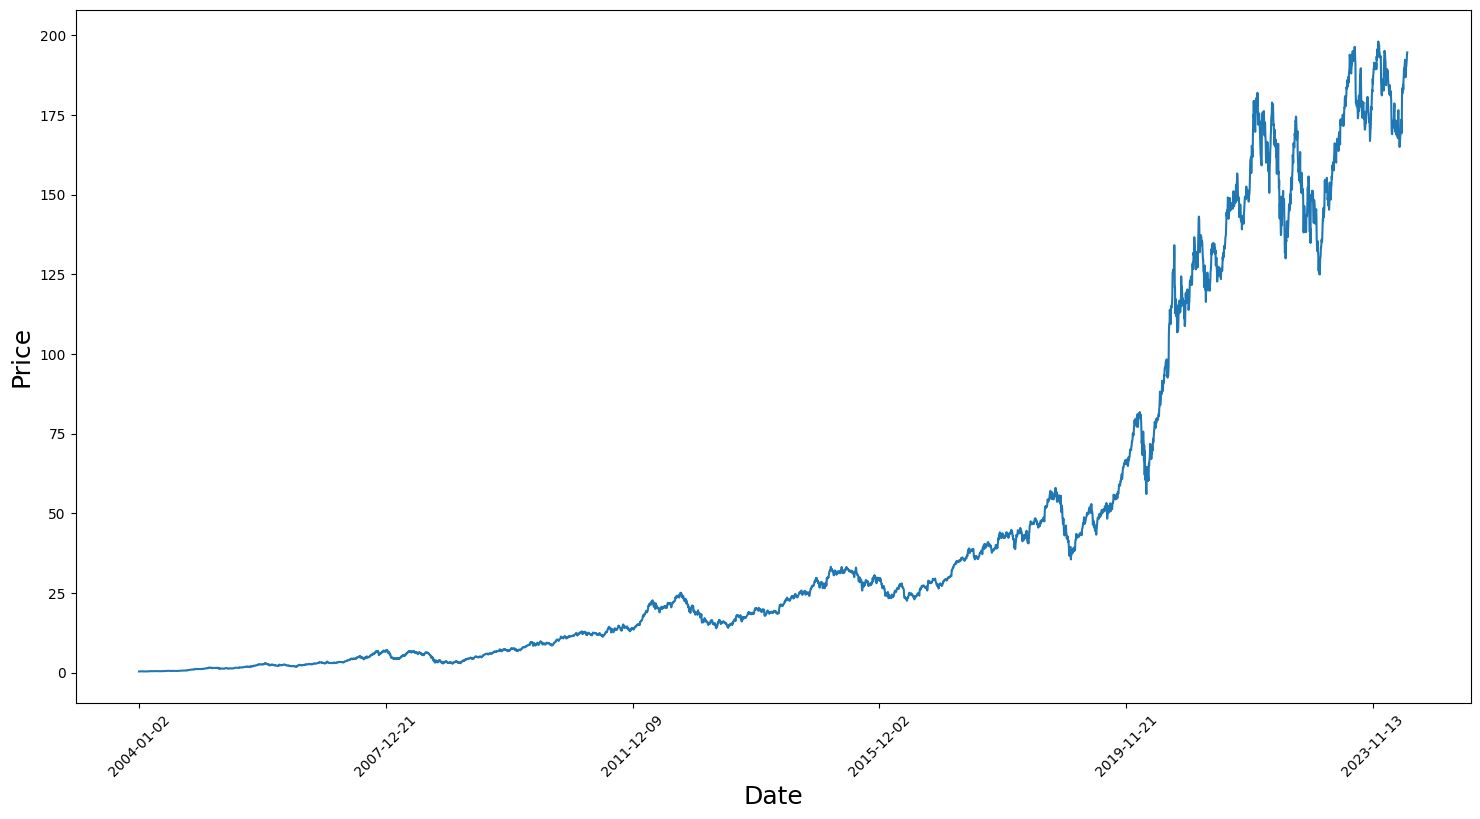

In [116]:
plt.figure(figsize = (18,9))
plt.plot(range(A_df.shape[0]),A_df['AAPL'])
plt.xticks(range(0,A_df.shape[0],1000),A_df.index[::1000],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price',fontsize=18)
plt.show()

#### Normalizing the Data


In [117]:
scaler = MinMaxScaler()
prices = np.array(A_df['AAPL'])
train_data = prices[:4000].reshape(-1,1)
test_data = prices[4000:].reshape(-1,1)

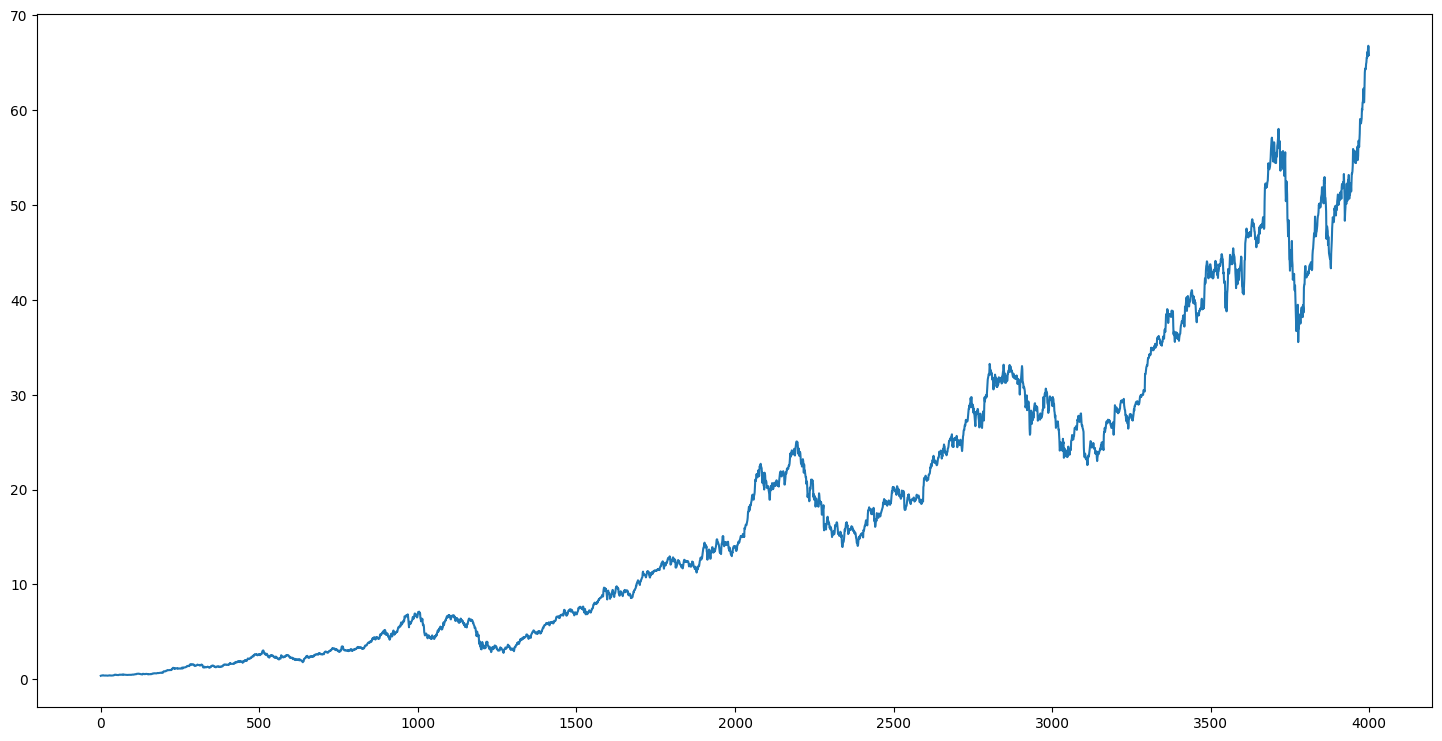

In [118]:
plt.figure(figsize = (18,9))
plt.plot(range(len(prices[:4000])), prices[:4000] )
plt.show()

In [119]:
'''
# Train the Scaler with training data and smooth data
smoothing_window_size = 1000
for di in range(0,3000,smoothing_window_size):
    scaler.fit(train_data[di:di+smoothing_window_size,:])
    train_data[di:di+smoothing_window_size,:] = scaler.transform(train_data[di:di+smoothing_window_size,:])

# You normalize the last bit of remaining data
scaler.fit(train_data[di+smoothing_window_size:,:])
train_data[di+smoothing_window_size:,:] = scaler.transform(train_data[di+smoothing_window_size:,:])
'''

'\n# Train the Scaler with training data and smooth data\nsmoothing_window_size = 1000\nfor di in range(0,3000,smoothing_window_size):\n    scaler.fit(train_data[di:di+smoothing_window_size,:])\n    train_data[di:di+smoothing_window_size,:] = scaler.transform(train_data[di:di+smoothing_window_size,:])\n\n# You normalize the last bit of remaining data\nscaler.fit(train_data[di+smoothing_window_size:,:])\ntrain_data[di+smoothing_window_size:,:] = scaler.transform(train_data[di+smoothing_window_size:,:])\n'

In [92]:
'''
# Reshape both train and test data
train_data = train_data.reshape(-1,1)
'''

'\n# Reshape both train and test data\ntrain_data = train_data.reshape(-1,1)\n'

In [93]:
'''
# Normalize test data
test_data = scaler.transform(test_data).reshape(-1,1)
'''

'\n# Normalize test data\ntest_data = scaler.transform(test_data).reshape(-1,1)\n'

In [94]:
'''
plt.figure(figsize = (18,9))
plt.plot(range(len(train_data)), train_data )
plt.show()
'''

'\nplt.figure(figsize = (18,9))\nplt.plot(range(len(train_data)), train_data )\nplt.show()\n'

In [120]:
train_data

array([[ 0.38      ],
       [ 0.39589301],
       [ 0.39446399],
       ...,
       [66.77500153],
       [66.57250214],
       [65.79750061]])

In [121]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(train_data)

In [122]:
scaled_data_test = scaler.transform(test_data)

In [123]:
scaled_data

array([[0.00000000e+00],
       [2.39370614e-04],
       [2.17847588e-04],
       ...,
       [1.00000000e+00],
       [9.96950081e-01],
       [9.85277492e-01]])

In [124]:
# Set the number of days used for prediction
prediction_days = 30

# Initialize empty lists for training data input and output
x = []
y = []

# Iterate through the scaled data, starting from the prediction_days index
for i in range(prediction_days, len(scaled_data)):
    # Append the previous 'prediction_days' values to x_train
    x.append(scaled_data[i - prediction_days:i, 0])
    # Append the current value to y_train
    y.append(scaled_data[i, 0])

# Convert the x_train and y_train lists to numpy arrays
x_train, y_train = np.array(x), np.array(y)

# Reshape x_train to a 3D array with the appropriate dimensions for the LSTM model
#x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [125]:
#samples, time, features
y_train.shape

(3970,)

In [126]:
import numpy as np
import pandas as pd

import os
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [127]:
# create and fit the LSTM network
model = Sequential()
model.add(Dense(4, input_dim=x_train.shape[1]))
model.add(Dense(1))

/Users/lme/.pyenv/versions/3.10.6/envs/lwhf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [128]:
model.compile(loss= 'mse', optimizer='adam')


In [129]:
## exponential moving average?

In [130]:
model.fit(x_train, y_train)

In [288]:
# Exponential moving average smoothing
# So the data will have a smoother curve than the original ragged data

EMA = 0.0
gamma = 0.1
for ti in range(4000):
  EMA = gamma*train_data[ti] + (1-gamma)*EMA
  train_data[ti] = EMA

# Used for visualization and test purposes
all_data = np.concatenate([train_data,test_data],axis=0)

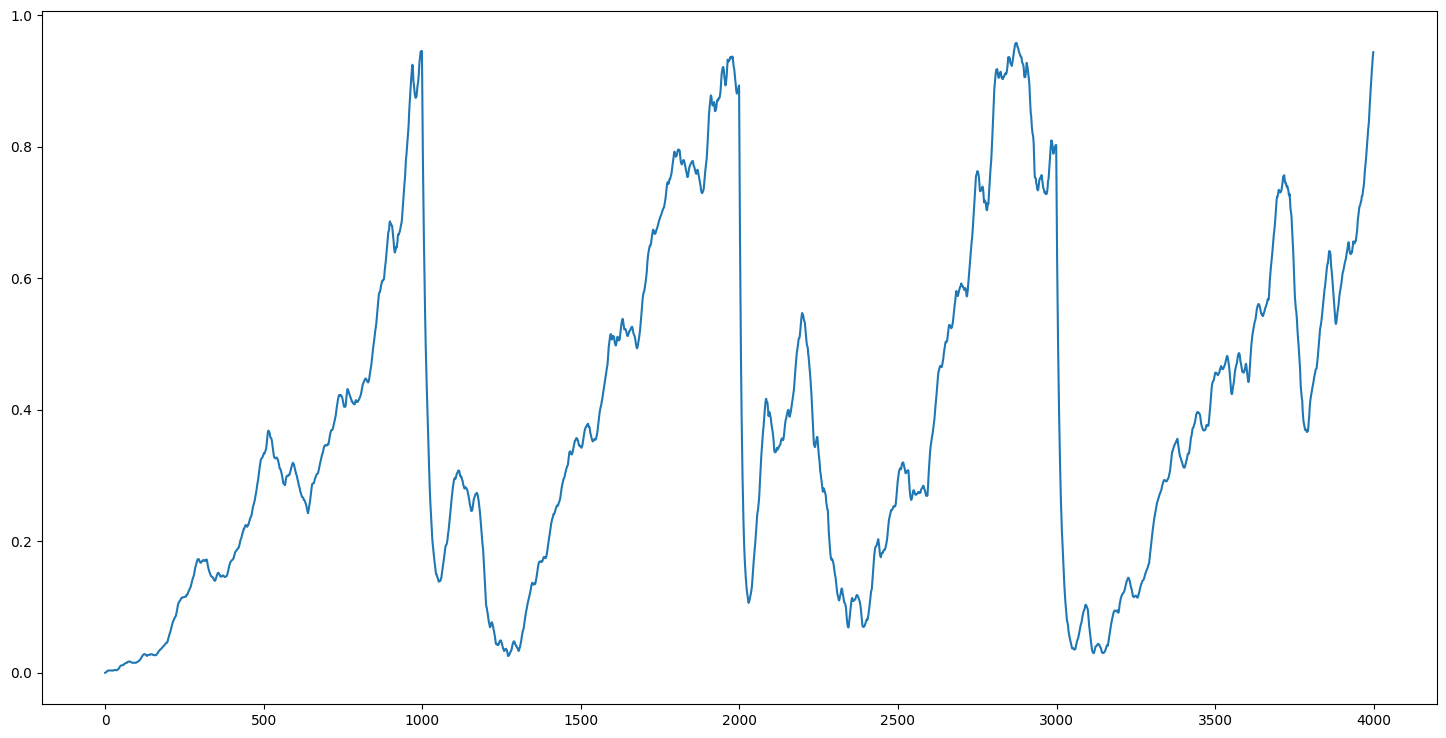

In [289]:
plt.figure(figsize = (18,9))
plt.plot(range(len(train_data)), train_data )
plt.show()

In [292]:
window_size = 100
N = train_data.size
std_avg_predictions = []
std_avg_x = []
mse_errors = []

for pred_idx in range(window_size,N):

    if pred_idx >= N:
        date = dt.datetime.strptime(k, '%Y-%m-%d').date() + dt.timedelta(days=1)
    else:
        date = A_df.loc[pred_idx,'Date']

    std_avg_predictions.append(np.mean(train_data[pred_idx-window_size:pred_idx]))
    mse_errors.append((std_avg_predictions[-1]-train_data[pred_idx])**2)
    std_avg_x.append(date)

print('MSE error for standard averaging: %.5f'%(0.5*np.mean(mse_errors)))

KeyError: 'Date'

In [ ]:
import data
from lwhf.ml_logic.data_BQ import get_data

df = get_data(start_date='2023-01-01', end_date='2024-01-05', timestep_data = 'W', data_from_yahoo = True)

In [ ]:
df = get_data(start_date='2023-01-01', end_date='2024-01-05', timestep_data = 'W', data_from_yahoo = True)